In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from PIL import Image, ImageFilter, ImageOps

In [2]:
images = [cv2.imread(file) for file in glob.glob("C:/Users/devda/Major/Data/all-mias/JPEG/WOPectoralNew/*.jpg")]

In [3]:
df = pd.read_csv('C:/Users/devda/Major/Data/Info.csv')
df.X = df.X.fillna(1024)
df.RADIUS = df.RADIUS.fillna(0)
df.X = df.X.astype(int)
df.RADIUS = df.RADIUS.astype(int)

In [4]:
tdf = df[df['RADIUS'] > 0] 
tdf.reset_index(inplace = True)

In [5]:
doubtful = [0] * tdf.shape[0]
for i in range(tdf.shape[0]):
    idx = tdf['REFNUM'][i]
    doubtful[i] = images[idx]


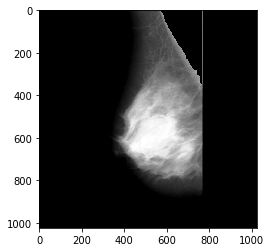

In [6]:
plt.imshow(doubtful[0])

In [8]:
os.mkdir('NewDoubtful')
for i in range(tdf.shape[0]):
    cv2.imwrite("NewDoubtful/doubtful%03i.jpg" %(i+1), doubtful[i])

In [11]:
tumors = [cv2.imread(file) for file in glob.glob("C:/Users/devda/Major/Data/all-mias/JPEG/Tumors/*.jpg")]

In [16]:
form = [0] * 238
j = 0
k = 0
for i in range(238):
    if i%2==0:
        form[i] = doubtful[j]
        j = j+1
    else:
        form[i] = tumors[k]
        k = k+1

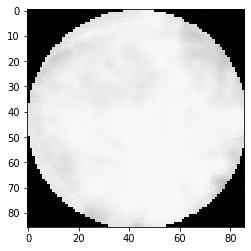

In [19]:
plt.imshow(form[53])

In [23]:
os.mkdir('Form')
for i in range(len(form)):
    cv2.imwrite("Form/form%03i.jpg" %(i+1), form[i])